In [14]:
import pandas as pd
import numpy as np
import json

In [7]:
df = pd.read_csv('../data/itemData.csv')
df = df.drop(labels=['Unnamed: 0'], axis=1)

In [8]:
df.head().T

,0,1,2,3,4
hike_name,Grand Park via Lake Eleanor,Shellrock Pass,Soda Peaks Lake,Shorthorn,West Fork Teanaway River
hike_id,0,1,2,3,4
numReports,212,2,24,5,5
total_dist,8,NaN,7,5.6,19.2
elevation gain,1100,NaN,2500,1400,2800
time_from_seattle,116.533,NaN,227.333,207.433,115.75
Coast,0,0,0,0,0
stars,4.25,2.33,3,3.67,2.75
Dogs allowed on leash,0,1,0,1,1
Established campsites,1,0,0,0,1


## Using Feature Importance from Gradient Boosting to get weights

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
df = df.dropna()
X = df[[u'elevation gain', u'time_from_seattle', u'numReports', 
        u'total_dist', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife']]
y = df.stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gb = GradientBoostingRegressor(min_samples_leaf=3, random_state=0).fit(X_train, y_train)
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, gb.predict(X_test)))))

RMSE: 1.060894954702379


/Users/jadetabony/miniconda3/envs/aind/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


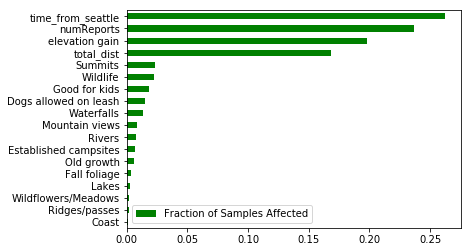

In [11]:
feat_imp = gb.feature_importances_
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gb.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', color='green')

In [12]:
weights = dict(zip(X.columns, gb.feature_importances_))

In [13]:
weights

{'Coast': 0.0008605416502796801,
 'Dogs allowed on leash': 0.015485443549527633,
 'Established campsites': 0.007265152002914418,
 'Fall foliage': 0.003734896224677904,
 'Good for kids': 0.018869290343909564,
 'Lakes': 0.0025923560848305394,
 'Mountain views': 0.008364118987063957,
 'Old growth': 0.006148622728215646,
 'Ridges/passes': 0.0017456838896329156,
 'Rivers': 0.0077048155791259966,
 'Summits': 0.023042377674711238,
 'Waterfalls': 0.013400840316294587,
 'Wildflowers/Meadows': 0.0018299341255906603,
 'Wildlife': 0.02294547318827456,
 'elevation gain': 0.19793960947377007,
 'numReports': 0.23698143453301185,
 'time_from_seattle': 0.26267208494186467,
 'total_dist': 0.16841732470630383}

In [47]:
def prettyPrint(scores):
    for score in scores:
        print 'Hike Name: ', df.ix[score]['hike_name']
        print 'Miles: ', df.ix[score]['total_dist']
        print 'EG: ', df.ix[score]['elevation gain']

In [15]:
# writes weights for use in model
with open('../data/weights.json', 'w') as weight_fp:
    json.dump(weights, weight_fp)